In [ ]:
# Mount google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# navigasi ke home folder
% cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
# cek folder yang ada ditempah kita sekarang
! ls

'Colab Notebooks'   'Live Code'   Phase0-Kode.id  'Phase 2'
 data		     Milestone	  Phase1	   Phase2-Kode.id
'Graded Challenge'   Phase0	  Phase1-Kode.id   tf_serving


In [ ]:
# masuk ke tf_serving
% cd tf_serving

/content/drive/MyDrive/tf_serving


In [ ]:
# bikin folder coba-coba
! mkdir coba

In [ ]:
# hapus folder coba-coba
! rm -r coba

In [ ]:
# load data
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/afifai/pelatihan_machinelearning/master/data/train.csv", index_col=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=46)

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


num_col = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
cat_col = ['Sex']

num_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                             StandardScaler())

cat_pipeline = make_pipeline(OneHotEncoder())

data_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_col),
    ('pipe_cat', cat_pipeline, cat_col)
])

In [ ]:
# ekstrak fitur menggunakan pipeline

X_train = data_pipeline.fit_transform(X_train)
X_val = data_pipeline.transform(X_val)

In [ ]:
X_train.shape

(712, 7)

In [ ]:
X_train[:5]

array([[ 0.81892151, -0.09575826, -0.46517734, -0.47485701, -0.50473909,
         0.        ,  1.        ],
       [ 0.81892151, -0.64744556, -0.46517734, -0.47485701, -0.49621672,
         1.        ,  0.        ],
       [-1.58549959,  0.69236646, -0.46517734, -0.47485701, -0.65920709,
         0.        ,  1.        ],
       [-1.58549959,  1.28346   , -0.46517734, -0.47485701, -0.05198805,
         0.        ,  1.        ],
       [ 0.81892151, -0.09575826, -0.46517734, -0.47485701, -0.49355347,
         0.        ,  1.        ]])

In [ ]:
# BUILD MODEL
# sequential API
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense # Fully connected layer

# deklarasi model
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(7,))) # hidden layer 4 neuron
model.add(Dense(1, activation='sigmoid'))

# compile
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

# train
history = model.fit(X_train, y_train, epochs=300, validation_data=(X_val, y_val))

Epoch 1/300
23/23 [==============================] - 4s 16ms/step - loss: 0.8853 - accuracy: 0.2837 - val_loss: 0.8992 - val_accuracy: 0.2346
Epoch 2/300
23/23 [==============================] - 0s 4ms/step - loss: 0.8460 - accuracy: 0.2963 - val_loss: 0.8617 - val_accuracy: 0.2682
Epoch 3/300
23/23 [==============================] - 0s 4ms/step - loss: 0.8122 - accuracy: 0.3357 - val_loss: 0.8286 - val_accuracy: 0.3128
Epoch 4/300
23/23 [==============================] - 0s 4ms/step - loss: 0.7825 - accuracy: 0.3722 - val_loss: 0.7999 - val_accuracy: 0.3240
Epoch 5/300
23/23 [==============================] - 0s 4ms/step - loss: 0.7579 - accuracy: 0.3806 - val_loss: 0.7747 - val_accuracy: 0.3073
Epoch 6/300
23/23 [==============================] - 0s 4ms/step - loss: 0.7350 - accuracy: 0.4087 - val_loss: 0.7505 - val_accuracy: 0.3408
Epoch 7/300
23/23 [==============================] - 0s 4ms/step - loss: 0.7135 - accuracy: 0.4326 - val_loss: 0.7294 - val_accuracy: 0.3520
Epoch 8/300


In [ ]:
import pandas as pd
metrics = pd.DataFrame(history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.885318,0.283708,0.899183,0.234637
1,0.846041,0.296348,0.861693,0.268156
2,0.812158,0.335674,0.828560,0.312849
3,0.782493,0.372191,0.799885,0.324022
4,0.757949,0.380618,0.774688,0.307263


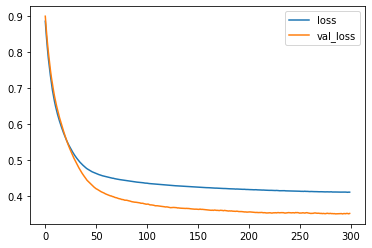

In [ ]:
import matplotlib.pyplot as plt
metrics[['loss', 'val_loss']].plot()

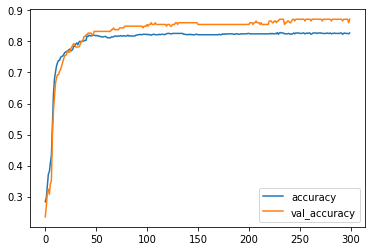

In [ ]:
metrics[['accuracy', 'val_accuracy']].plot()

In [ ]:
from sklearn.metrics import classification_report
import numpy as np
y_pred = model.predict(X_val)
y_pred = np.where (y_pred > 0.5, 1,0)
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90       104
           1       0.93      0.75      0.83        75

    accuracy                           0.87       179
   macro avg       0.89      0.85      0.86       179
weighted avg       0.88      0.87      0.87       179



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 32        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# freeze model
# for layer in model.layers:
#   layer.trainable = False

model.trainable = False

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 32        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 0
Non-trainable params: 37
_________________________________________________________________


In [ ]:
model.save("titanic")

INFO:tensorflow:Assets written to: titanic/assets


In [ ]:
X_val.tolist()

[[0.8189215120865428,
  -0.6474455632439493,
  -0.46517733904102565,
  -0.47485701118825807,
  -0.31618159662655665,
  0.0,
  1.0],
 [0.8189215120865428,
  -0.09575826022624177,
  -0.46517733904102565,
  -0.47485701118825807,
  -0.49444193154746235,
  1.0,
  0.0],
 [0.8189215120865428,
  0.6923664583704833,
  -0.46517733904102565,
  -0.47485701118825807,
  -0.47464446023756657,
  0.0,
  1.0],
 [0.8189215120865428,
  -0.09575826022624177,
  0.43240061596496426,
  0.8058179583800742,
  -0.3343811230933163,
  0.0,
  1.0],
 [0.8189215120865428,
  0.5347415146511383,
  -0.46517733904102565,
  -0.47485701118825807,
  -0.6592070896198015,
  0.0,
  1.0],
 [0.8189215120865428,
  -0.6474455632439493,
  -0.46517733904102565,
  -0.47485701118825807,
  -0.4903575845284061,
  0.0,
  1.0],
 [0.8189215120865428,
  -0.8050705069632943,
  -0.46517733904102565,
  -0.47485701118825807,
  -0.6592070896198015,
  0.0,
  1.0],
 [0.8189215120865428,
  -0.6474455632439493,
  -0.46517733904102565,
  -0.474857011

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,7.2500
2,1,1,female,38.0,1,0,71.2833
3,1,3,female,26.0,0,0,7.9250
4,1,1,female,35.0,1,0,53.1000
5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000
888,1,1,female,19.0,0,0,30.0000
889,0,3,female,NaN,1,2,23.4500
